In [136]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
input_files = os.path.join('.','Resources','*.csv')
# files = [f for f in glob.glob(input_files)]
df_data=pd.concat([pd.read_csv(file)for file in glob.glob(input_files)])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40900 entries, 0 to 192
Data columns (total 9 columns):
State                    40900 non-null object
ZipCode                  40900 non-null int64
TaxRegionName            40900 non-null object
StateRate                40900 non-null float64
EstimatedCombinedRate    40900 non-null float64
EstimatedCountyRate      40900 non-null float64
EstimatedCityRate        40900 non-null float64
EstimatedSpecialRate     40900 non-null float64
RiskLevel                40900 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB


In [137]:
states = [{'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}]
states
df_states= pd.DataFrame(states).T

df_states.reset_index(inplace=True)
df_states.rename(columns={0:"State Name","index":"State"},inplace=True)
df_states
# df_data['State Name'] = df['State'].replace('\s*\d+]', '', regex=True)

,State,State Name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [138]:
df_data=df_data.merge(df_states,how="inner", on = "State")
df_data["Local Taxes"]=df_data["EstimatedCountyRate"] + df_data["EstimatedCityRate"] + df_data["EstimatedSpecialRate"]
df_data.head()

,State,ZipCode,TaxRegionName,StateRate,EstimatedCombinedRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,RiskLevel,State Name
0,AK,99501,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska
1,AK,99502,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska
2,AK,99503,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska
3,AK,99504,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska
4,AK,99505,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska


In [139]:
grp_by_state = df_data.groupby(["State","State Name"])

In [140]:
df_state_tax = grp_by_state[["StateRate"]].mean()
df_state_tax

,,StateRate
State,State Name,
AK,Alaska,0.000000
AL,Alabama,0.040000
AR,Arkansas,0.065000
AZ,Arizona,0.056000
CA,California,0.060000
CO,Colorado,0.029000
CT,Connecticut,0.063500
DC,District of Columbia,0.060000
DE,Delaware,0.000000


# States with no state sales tax


In [141]:
# df_state_tax["Has State Tax"] = df_state_tax.apply(lambda x: True if x["StateRate"]==0.0 else False,axis=1)
df_state_tax["Has State Tax"] = df_state_tax["StateRate"]!=0.0 

df_state_tax[df_state_tax["Has State Tax"]==False][[]]

,
State,State Name
AK,Alaska
DE,Delaware
MT,Montana
NH,New Hampshire
OR,Oregon


# States with state sales tax

In [142]:
df_state_tax[df_state_tax["Has State Tax"]==True][["StateRate"]]


,,StateRate
State,State Name,
AL,Alabama,0.040000
AR,Arkansas,0.065000
AZ,Arizona,0.056000
CA,California,0.060000
CO,Colorado,0.029000
CT,Connecticut,0.063500
DC,District of Columbia,0.060000
FL,Florida,0.060000
GA,Georgia,0.040000


# Pie Chart


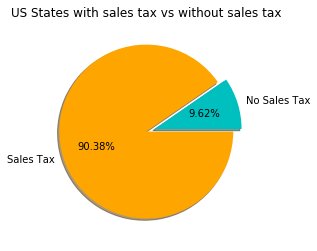

<Figure size 432x288 with 0 Axes>

In [143]:
df_cnt = df_state_tax.groupby("Has State Tax").count()
df_cnt
plt.pie(df_cnt["StateRate"],labels=["No Sales Tax","Sales Tax"]  ,colors=['c','orange'] ,explode=[0.1,0],shadow=True,
       autopct="%1.2f%%")
plt.title("US States with sales tax vs without sales tax")
plt.show()
plt.tight_layout()

In [147]:
df_local_tax = grp_by_state[["Local Taxes"]].mean()
df_local_tax

,,Local Taxes
State,State Name,
AK,Alaska,0.018930
AL,Alabama,0.040218
AR,Arkansas,0.021232
AZ,Arizona,0.023141
CA,California,0.023012
CO,Colorado,0.032664
CT,Connecticut,0.000000
DC,District of Columbia,0.000000
DE,Delaware,0.000000


# States with no Local Taxes

In [148]:
df_local_tax["Has Local Tax"] = df_local_tax["Local Taxes"]!=0.0 

df_local_tax[df_local_tax["Has Local Tax"]==False][[]]

,
State,State Name
CT,Connecticut
DC,District of Columbia
DE,Delaware
IN,Indiana
KY,Kentucky
MA,Massachusetts
MD,Maryland
ME,Maine
MI,Michigan


# States with local taxes

In [150]:

df_local_tax[df_local_tax["Has Local Tax"]==True][["Local Taxes"]]

,,Local Taxes
State,State Name,
AK,Alaska,0.018930
AL,Alabama,0.040218
AR,Arkansas,0.021232
AZ,Arizona,0.023141
CA,California,0.023012
CO,Colorado,0.032664
FL,Florida,0.008291
GA,Georgia,0.034522
HI,Hawaii,0.002518


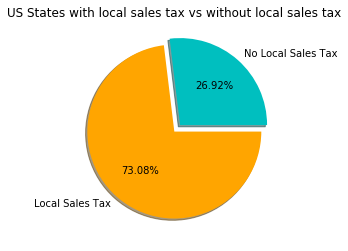

<Figure size 432x288 with 0 Axes>

In [152]:
df_local = df_local_tax.groupby("Has Local Tax").count()
#df_local
plt.pie(df_local["Local Taxes"],labels=["No Local Sales Tax","Local Sales Tax"]  ,colors=['c','orange'] ,explode=[0.1,0],shadow=True,
       autopct="%1.2f%%")
plt.title("US States with local sales tax vs without local sales tax")
plt.show()
plt.tight_layout()